In [2]:
import pandas as pd  

df = pd.read_csv('auto-mpg.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
df.isnull()

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

18.0                         0
8                            0
307.0                        0
130.0                        0
3504.                        0
12.0                         0
70                           0
1                            0
chevrolet chevelle malibu    0
dtype: int64

In [ ]:


# 열 이름들을 리스트로 만들어서 준비!
# 'car name'에는 띄어쓰기가 있어서 따옴표 안에 넣을 때 주의해야 해.
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']

# read_csv를 할 때 names라는 옵션을 사용해서 우리가 만든 열 이름을 넣어줘!
df = pd.read_csv('auto-mpg.csv', names=column_names)

# 데이터가 잘 불러와졌는지 처음 5줄 확인!
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', pd.NA))
median_horsepower = df['horsepower'].median()
print(f"\nhorsepower의 중앙값: {median_horsepower}")
print(f"\nhorsepower의 중앙값: {median_horsepower}")


horsepower의 중앙값: 93.5

horsepower의 중앙값: 93.5


In [ ]:
# 'car name' 열을 제거하고, 새로운 DataFrame을 만들기
# axis=1은 '열(column)'을 제거하겠다는 뜻이야. (axis=0은 '행(row)'을 제거할 때 사용해)
# inplace=False는 원본 데이터를 바꾸지 않고, 새로운 데이터를 만들어서 반환하라는 뜻이야.
# 우리는 새로운 DataFrame을 만들라고 했으니 이렇게 쓰는 거야!
df_cleaned = df.drop('car name', axis=1, inplace=False)

In [ ]:
print("--- 'car name' 열 제거 후 데이터 (df_cleaned) ---")
print(df_cleaned.head())

--- 'car name' 열 제거 후 데이터 (df_cleaned) ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [ ]:
# df_cleaned 데이터에서 'mpg' 열의 값이 30 이상인 행 골라내기

high_mpg = df_cleaned[df_cleaned['mpg'] >= 30]

In [ ]:
# 'high_mpg' 데이터에 'hp_weight_ratio'라는 새로운 열을 만들고
# 'horsepower' 열의 값을 'weight' 열의 값으로 나눈 결과를 넣어줄 거야.
high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight']


/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_22022/2810211102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_mpg['hp_weight_ratio'] = high_mpg['horsepower'] / high_mpg['weight']


In [ ]:
print("\n--- 'hp_weight_ratio' 열 추가 후 (high_mpg의 처음 5줄) ---")
print(high_mpg.head())


--- 'hp_weight_ratio' 열 추가 후 (high_mpg의 처음 5줄) ---
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
51   30.0          4          79.0        70.0  2074.0          19.5   
52   30.0          4          88.0        76.0  2065.0          14.5   
53   31.0          4          71.0        65.0  1773.0          19.0   
54   35.0          4          72.0        69.0  1613.0          18.0   
129  31.0          4          79.0        67.0  1950.0          19.0   

     model year  origin  hp_weight_ratio  
51           71       2         0.033751  
52           71       2         0.036804  
53           71       3         0.036661  
54           71       3         0.042777  
129          74       3         0.034359  


In [ ]:
# # 'cylinders'와 'origin'을 기준으로 데이터를 묶어 준다. 
#그룹화  실린더 및 나라가 기준으로  묶어서 특징 알아 알아 보기  
grouped_data = df_cleaned.groupby(['cylinders', 'origin'])


In [ ]:
# 그룹화된 데이터에서 각 항목별로 원하는 계산을 적용
result = grouped_data.agg(
    mpg_mean=('mpg', 'mean'),             # 'mpg' 열의 평균을 'mpg_mean'이라는 이름으로
    mpg_std=('mpg', 'std'),               # 'mpg' 열의 표준편차를 'mpg_std'라는 이름으로
    horsepower_max=('horsepower', 'max'), # 'horsepower' 열의 최대값을 'horsepower_max'라는 이름으로
    horsepower_min=('horsepower', 'min')  # 'horsepower' 열의 최소값을 'horsepower_min'이라는 이름으로
)

# 결과를 출력해서 확인해 볼까?
print("--- 실린더 및 생산 국가별 통계 분석 결과 ---")
print(result)

--- 실린더 및 생산 국가별 통계 분석 결과 ---
                   mpg_mean   mpg_std  horsepower_max  horsepower_min
cylinders origin                                                     
3         3       20.550000  2.564501           110.0            90.0
4         1       27.840278  4.549560           105.0            52.0
          2       28.411111  6.442503           115.0            46.0
          3       31.595652  5.435787           100.0            52.0
5         2       27.366667  8.228204           103.0            67.0
6         1       19.663514  3.374992           165.0            72.0
          2       20.100000  7.074367           133.0            76.0
          3       23.883333  4.951936           132.0            97.0
8         1       14.963107  2.836284           230.0            90.0


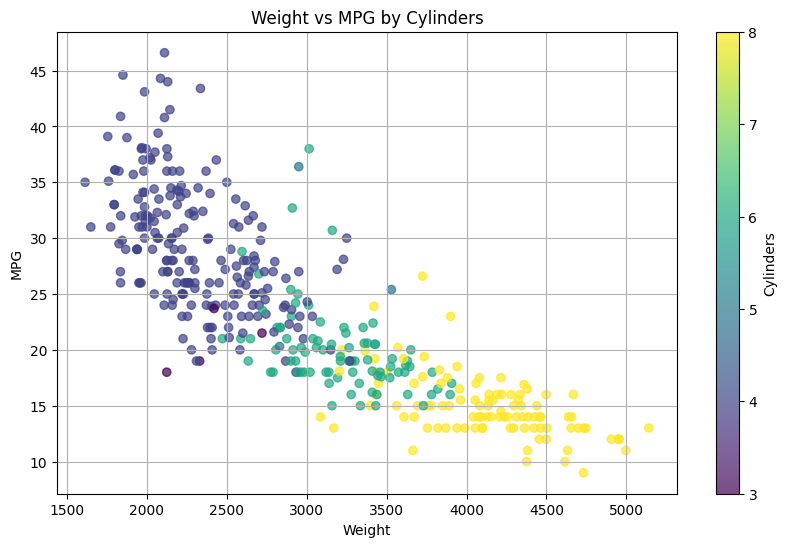

In [ ]:

import matplotlib.pyplot as plt 

# 그림 그리는 도구, plt라고 부르기로 약속!


# 그림의 크기를 미리 정해줄 수 있어. (가로 10인치, 세로 6인치)
plt.figure(figsize = (10 ,6))

# 산점도를 그릴 거야.
# x축은 'weight'(무게), y축은 'mpg'(연비)
# c='cylinders'는 'cylinders' 값에 따라 점들의 색깔을 다르게 해줘.
# cmap='viridis'는 색깔을 어떤 스타일로 할지 정하는 건데, 예쁜 색상 조합이야!
# alpha=0.7은 점들이 겹쳐 보일 때 투명하게 만들어서 아래 점이 보이도록 하는 거야.

# ...existing code...
plt.scatter(df_cleaned['weight'], df_cleaned['mpg'], c=df_cleaned['cylinders'], cmap='viridis', alpha=0.7)
# ...existing code...

# 그림에 제목을 달아주자.
plt.title('Weight vs MPG by Cylinders')

# x축에 이름표를 붙여주자.
plt.xlabel('Weight')

# y축에 이름표를 붙여주자.
plt.ylabel('MPG')

# 오른쪽 아래에 색깔이 뭘 나타내는지 알려주는 막대(컬러바)를 넣어주자.
plt.colorbar(label='Cylinders')

# 격자(눈금선)를 넣어서 값을 더 쉽게 읽을 수 있게 하자.
plt.grid(True)

# 지금까지 그린 그림을 화면에 보여줘!
plt.show()

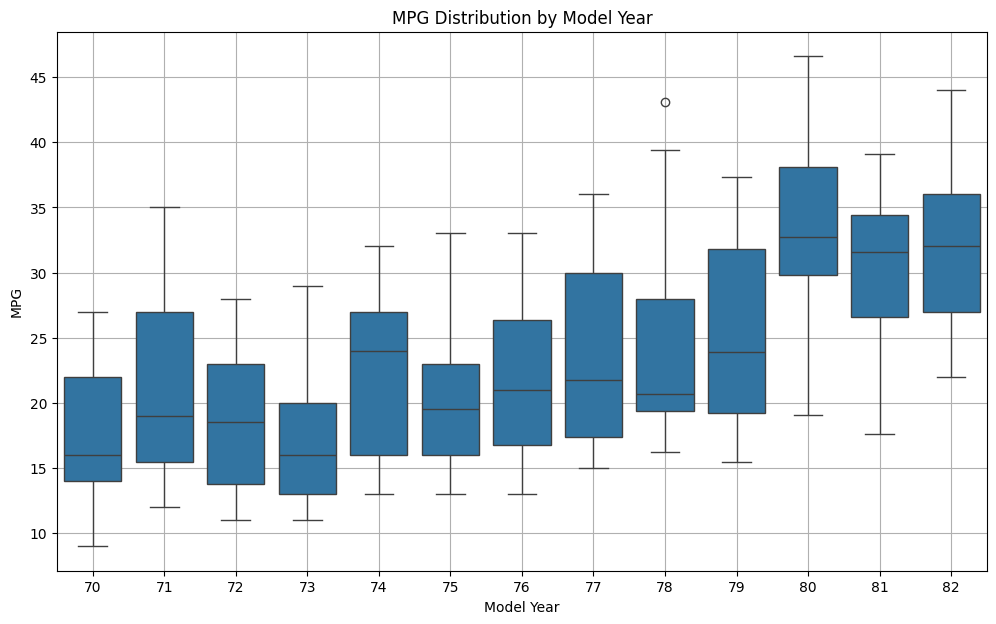

In [ ]:
# 이번에도 그림을 그릴 도화지 크기를 정해주자.
plt.figure(figsize=(12, 7))

# 박스플롯을 그릴 거야.
# x축은 'model year'(생산 연도)
# y축은 'mpg'(연비)
# data=df_cleaned는 어떤 데이터를 사용할지 알려주는 거야.
import seaborn as sns # 더 예쁜 그림을 그릴 때 쓰는 도구, sns라고 부르기로 약속!
sns.boxplot(x='model year', y='mpg', data=df_cleaned)

# 그림에 제목을 달아주자.
plt.title('MPG Distribution by Model Year')

# x축에 이름표를 붙여주자.
plt.xlabel('Model Year')

# y축에 이름표를 붙여주자.
plt.ylabel('MPG')

# 격자(눈금선)를 넣어서 값을 더 쉽게 읽을 수 있게 하자.
plt.grid(True)

# 지금까지 그린 그림을 화면에 보여줘!
plt.show()

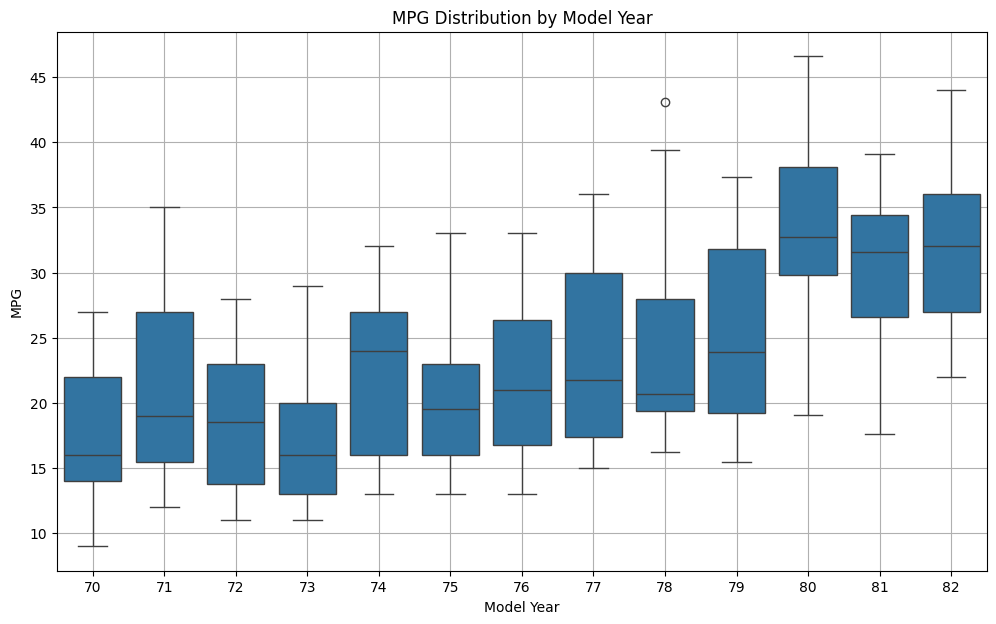

In [ ]:
import matplotlib.pyplot as plt # 그림 그리는 도구
import seaborn as sns # 더 예쁜 그림 그릴 때 쓰는 도구

# 그림을 그릴 도화지 크기를 정해주자.
plt.figure(figsize=(12, 7))

# 박스플롯을 그릴 거야.
# x축은 'model year'(생산 연도)
# y축은 'mpg'(연비)
# data=df_cleaned는 어떤 데이터를 사용할지 알려주는 거야.
sns.boxplot(x='model year', y='mpg', data=df_cleaned)

# 그림에 제목을 달아주자.
plt.title('MPG Distribution by Model Year')

# x축에 이름표를 붙여주자.
plt.xlabel('Model Year')

# y축에 이름표를 붙여주자.
plt.ylabel('MPG')

# 격자(눈금선)를 넣어서 값을 더 쉽게 읽을 수 있게 하자.
plt.grid(True)

# 지금까지 그린 그림을 화면에 보여줘!
plt.show()

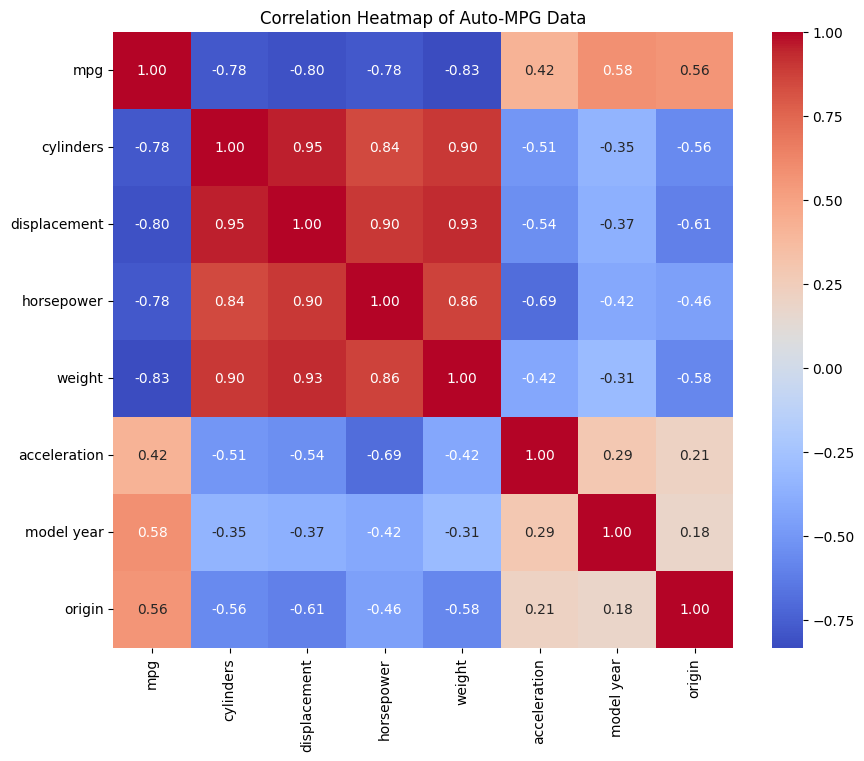

In [ ]:
import matplotlib.pyplot as plt # 그림 그리는 도구
import seaborn as sns           # 더 예쁜 그림 그릴 때 쓰는 도구

# 상관계수 매트릭스 다시 계산 (혹시 몰라서 다시 넣었어)
correlation_matrix = df_cleaned.corr(numeric_only=True)

# 그림의 크기를 설정 (매트릭스가 커지면 더 크게 하는 게 좋아)
plt.figure(figsize=(10, 8))

# 히트맵 그리기!
# annot=True: 각 칸에 숫자(상관계수)를 표시해줘.
# cmap='coolwarm': 색깔 테마를 정하는 건데, 'coolwarm'은 양수/음수를 색깔로 구분하기 좋아.
# fmt='.2f': 숫자를 소수점 둘째 자리까지 보여줘.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 그림에 제목을 달아주자.
plt.title('Correlation Heatmap of Auto-MPG Data')

# 그림을 화면에 보여줘!
plt.show()

/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

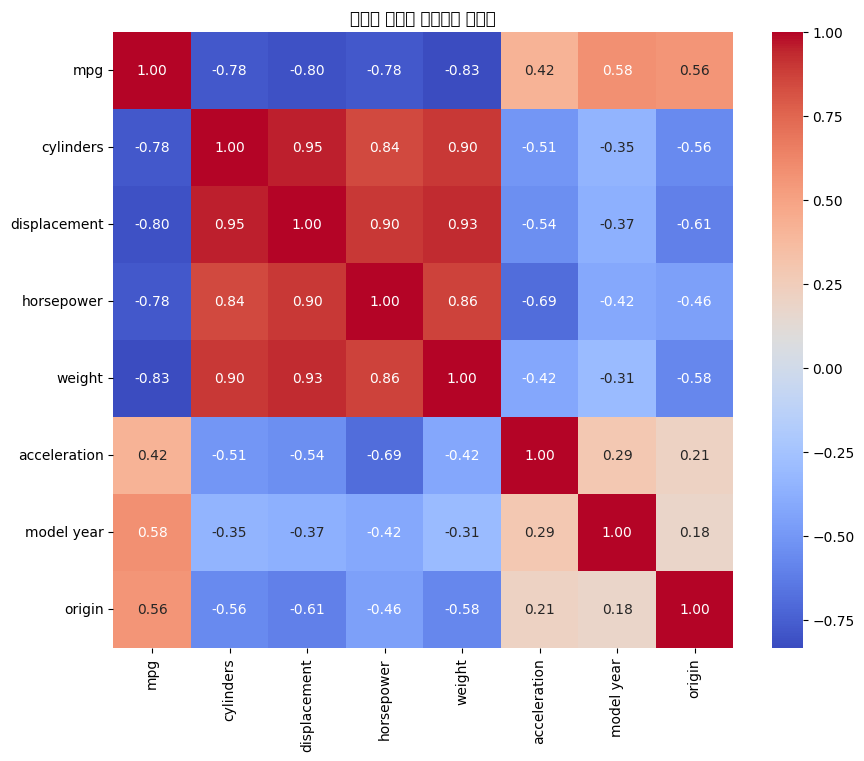

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# (다시 한 번 상관계수 매트릭스를 계산하는 코드, 확인용)
correlation_matrix = df_cleaned.corr(numeric_only=True)

# 그림이 잘 보이도록 크기를 정해줘.
plt.figure(figsize=(10, 8))

# 히트맵 그리기!
# annot=True: 그림 안에 상관계수 숫자도 함께 보여줘.
# cmap='coolwarm': 색깔 테마를 'coolwarm'으로 설정해서 양수/음수 상관관계를 쉽게 구분하게 해줘.
# fmt='.2f': 숫자를 소수점 둘째 자리까지 보여줘.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 그림에 제목을 붙여주자.
plt.title('자동차 데이터 상관계수 히트맵')

# 그림을 화면에 보여줘!
plt.show()

히트맵을 보면 **mpg(연비)**와 **weight(무게)** 사이의 상관계수가 -0.84로, 가장 강한 음의 상관관계를 보입니다.  
즉, 차가 무거울수록 연비가 나빠진다는 의미입니다.
cd /Users/bagjeongmin/pandas
미션에서는 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수를 묻고 있으니,  
0.95인 displacement와 cylinders, 그리고 -0.84인 mpg와 weight가 답이 될 수 있습니다.